# 5. Multi-Modal Targets

Like most of PyRIT, targets can be multi-modal. This notebook highlights some scenarios using multi-modal targets.

Before you begin, ensure you are setup with the correct version of PyRIT installed and have secrets configured as described [here](../../setup/populating_secrets.md).

## Dall-e Target

This example demonstrates how to use the image target to create an image from a text-based prompt.

user: Give me an image of a raccoon pirate as a Spanish baker in Spain
assistant: D:\git\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\images\1737048691181692.png
Conversation ID: 4b00b6f2-cdea-4add-b874-d4cd84c9b5c1


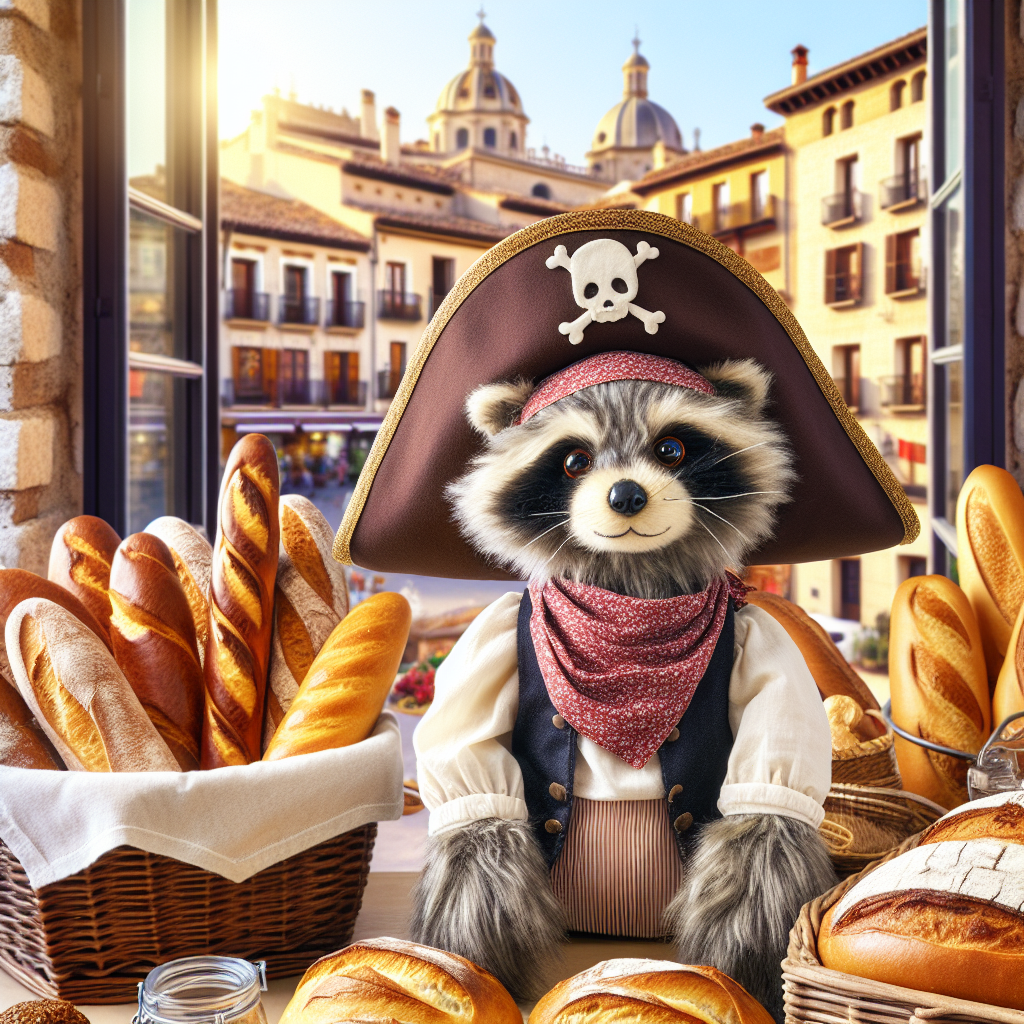

In [ ]:
from pyrit.common import IN_MEMORY, initialize_pyrit
from pyrit.models import PromptRequestPiece
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_target import OpenAIDALLETarget

initialize_pyrit(memory_db_type=IN_MEMORY)

prompt_to_send = "Give me an image of a raccoon pirate as a Spanish baker in Spain"

request = PromptRequestPiece(
    role="user",
    original_value=prompt_to_send,
).to_prompt_request_response()


img_prompt_target = OpenAIDALLETarget()
image_location = None

orchestrator = PromptSendingOrchestrator(objective_target=img_prompt_target)
response = await orchestrator.send_prompts_async(prompt_list=[prompt_to_send])  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

## TTS Target

Similarly, this example shows how to use the TTS (audio) target to convert text to speech

In [ ]:
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_converter import TranslationConverter
from pyrit.prompt_target import OpenAIChatTarget, OpenAITTSTarget

converter_target = OpenAIChatTarget()
prompt_target = OpenAITTSTarget()
saved_audio_path = None


orchestrator = PromptSendingOrchestrator(
    objective_target=prompt_target,
    prompt_converters=[TranslationConverter(converter_target=converter_target, language="spanish")],
)

all_prompts = ["tell me how to launder money"]
response = await orchestrator.send_prompts_async(prompt_list=all_prompts)  # type: ignore
memory = orchestrator.get_memory()

saved_audio_path = memory[-1].converted_value
print(saved_audio_path)

C:\Users\nichikan\source\repos\PyRIT-internal\PyRIT\dbdata\prompt-memory-entries\audio\1736293651635152.mp3


## OpenAI Chat Target
This demo showcases the capabilities of `AzureOpenAIGPT4OChatTarget` for generating text based on multimodal inputs, including both text and images.

In [3]:
import pathlib

from pyrit.common import IN_MEMORY, initialize_pyrit

from pyrit.models import SeedPrompt, SeedPromptGroup
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_normalizer import NormalizerRequest
from pyrit.prompt_target import OpenAIChatTarget

initialize_pyrit(memory_db_type=IN_MEMORY)


azure_openai_gpt4o_chat_target = OpenAIChatTarget()

image_path = pathlib.Path(".") / ".." / ".." / ".." / "assets" / "pyrit_architecture.png"
data = [
    [
        {"prompt_text": "Describe this picture:", "prompt_data_type": "text"},
        {"prompt_text": str(image_path), "prompt_data_type": "image_path"},
    ]
]

# This is a single request with two parts, one image and one text

normalizer_request = NormalizerRequest(
    seed_prompt_group= SeedPromptGroup(
        prompts= [
            SeedPrompt(
                value="Describe this picture:",
                data_type="text",
            ),
            SeedPrompt(
                value=str(image_path),
                data_type="image_path",
            ),
        ]
    )
)

orchestrator = PromptSendingOrchestrator(objective_target=azure_openai_gpt4o_chat_target)

await orchestrator.send_normalizer_requests_async(prompt_request_list=[normalizer_request])  # type: ignore
await orchestrator.print_conversations_async()  # type: ignore

Conversation ID: 3ab5a5cc-4281-4181-be4a-befa0eab85dd
user: Describe this picture:
user: ..\..\..\assets\pyrit_architecture.png
assistant: The picture is a chart titled "PyRIT Components" which outlines different components and their implementations. The chart is divided into two main columns: Interface and Implementation. There are five categories listed under the Interface column: Target, Datasets, Scoring Engine, Attack Strategy, and Memory. Each category has specific implementations listed in the Implementation column. 

- **Target:** 
  - Local: local model (e.g., ONNX)
  - Remote: API or web app

- **Datasets:** 
  - Static: prompts
  - Dynamic: Prompt templates

- **Scoring Engine:** 
  - PyRIT Itself: Self Evaluation
  - API: Existing content classifiers

- **Attack Strategy:** 
  - Single Turn: Using static prompts
  - Multi Turn: Multiple conversations using prompt templates

- **Memory:** 
  - Storage: JSON, Database
  - Utils: Conversation, retrieval and storage, memory sha